# Notebook for exploration and analysis of Fantasy Premier League data

The aim of this project is to see if current data science methods are able to predict the performance of Premier League Players. 

## Acknowledgements

Thank you to Github user Vaastav for providing the data used in this project.

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pathlib import Path
import os

## Loading player data

The dataset provided by Vaastav contains data for four seasons (2016 to 2019). 

In [67]:
seasons = ['2016-17', '2017-18', '2018-19', '2019-20']

data_list = []
for s in seasons:
    data_list.append(pd.read_csv(Path.cwd() / 'data' / s / 'cleaned_players.csv')) # 2016-17 data not UTF-8, Windows cp1250, ISO-8859-1, or mbcs, listed as "ANSI", which is a vague term. Quick solution: Opened in notepad and then saved as a UTF-8 file. Longer term solution, figure out encoding using chardet or UnicodeDammit. 

data_list[0]

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
0,David,Ospina,0,0,2,143,4,0.0,28.8,0,0,18,2.9,0,0,0,0.2
1,Petr,Cech,0,0,134,3097,37,0.1,819.8,0,2,660,82.0,12,0,2,13.7
2,Laurent,Koscielny,2,1,121,2821,37,53.9,831.2,239,19,723,112.7,10,1,4,11.2
3,Per,Mertesacker,0,0,1,38,1,0.1,17.8,0,0,5,1.8,0,0,0,0.2
4,Gabriel Armando,de Abreu,0,0,45,1517,18,84.5,295.8,119,2,296,50.0,5,0,6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Sam,Surridge,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
679,Angel,Gomes,0,0,1,3,0,3.8,0.8,0,0,2,0.5,0,0,0,0.0
680,Kieran,O'Hara,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0
681,Gerhard,Tremmel,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0


# Viewing player data for each season
### Specifically the top 5:
Goal scorers <br>
Mins/goal <br>
Assisters <br>
Mins/assist <br>
Points  <br>
Points/90 <br>
Points/cost<br>



## Top scorers

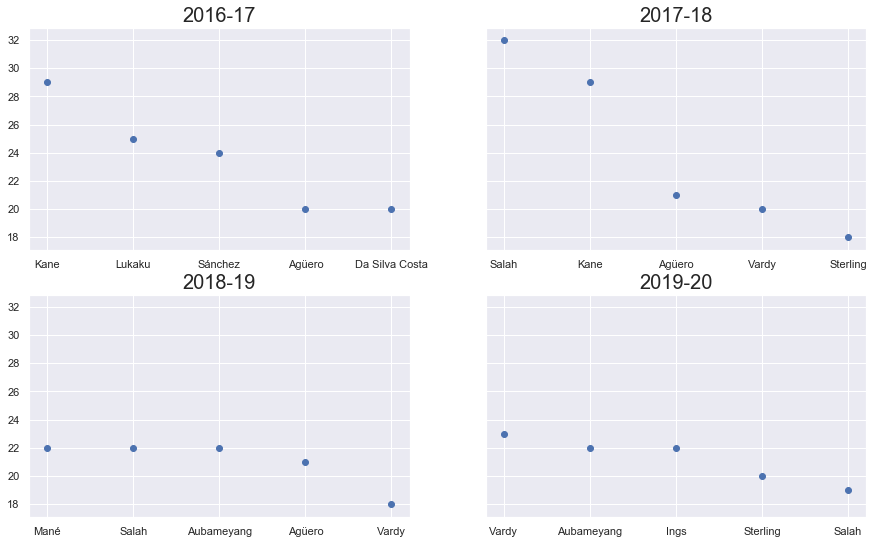

In [94]:
top_scorers = []
for d in data_list:
    top_scorers.append(d[['second_name', 'goals_scored']].sort_values(by='goals_scored', ascending=False).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_scorers[i]['second_name'], top_scorers[i]['goals_scored'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

### Observations
I bet you didn't realise Lukaku had a 25 goal season in 16-17. <br>
Salah's first season really was incredible. <br>
The race for the golden boot has been a close run thing these past two seasons.


## Top mins per goal (for players who scored > 10 goals)

In [83]:
for d in data_list:
    d['mins/goal'] = d['minutes']/d['goals_scored']
    d['mins/assist'] = d['minutes']/d['assists']
    d['points/90'] = d['total_points']/d['minutes']*90

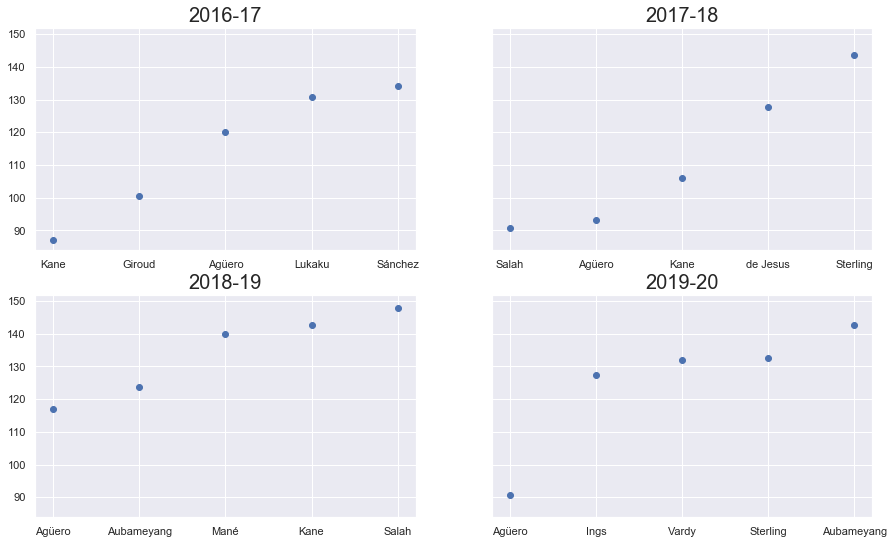

In [93]:
top_mpg = []
for d in data_list:
    d = d.loc[d['goals_scored'] > 10]
    top_mpg.append(d[['second_name', 'mins/goal']].sort_values(by='mins/goal', ascending=True).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_mpg[i]['second_name'], top_mpg[i]['mins/goal'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

### Observations
Kane was world class back in 16-17 but has struggled to hit those heights since. <br>
Giroud decided he wanted to be the best supersub in the world in 16-17. <br>
Aguero has been in the top 3 mins/goal for the past 4 seasons, yet hasn't won the golden boot in any of them. Injuries really have prevented him from posting outrageous numbers.   

## Top assisters

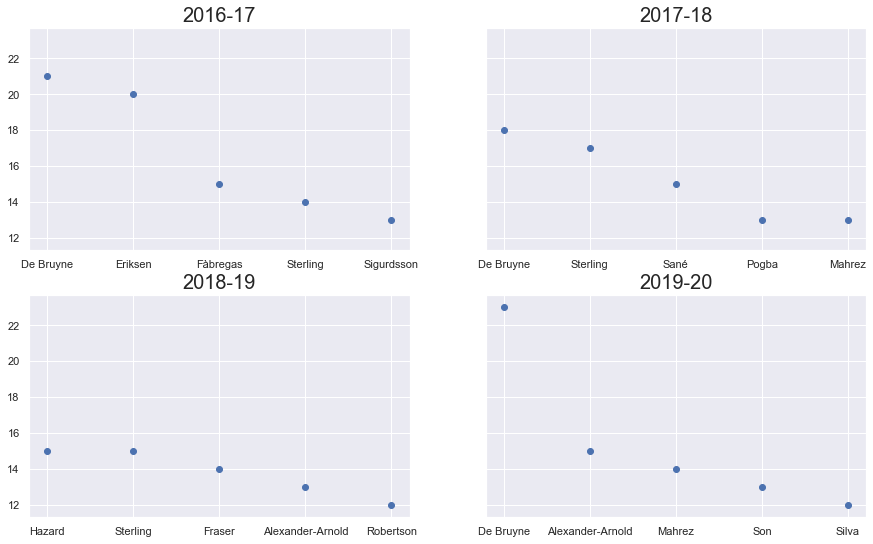

In [92]:
top_assisters = []
for d in data_list:
    top_assisters.append(d[['second_name', 'assists']].sort_values(by='assists', ascending=False).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_assisters[i]['second_name'], top_assisters[i]['assists'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

## Top mins per assist (for players with > 5 assists)

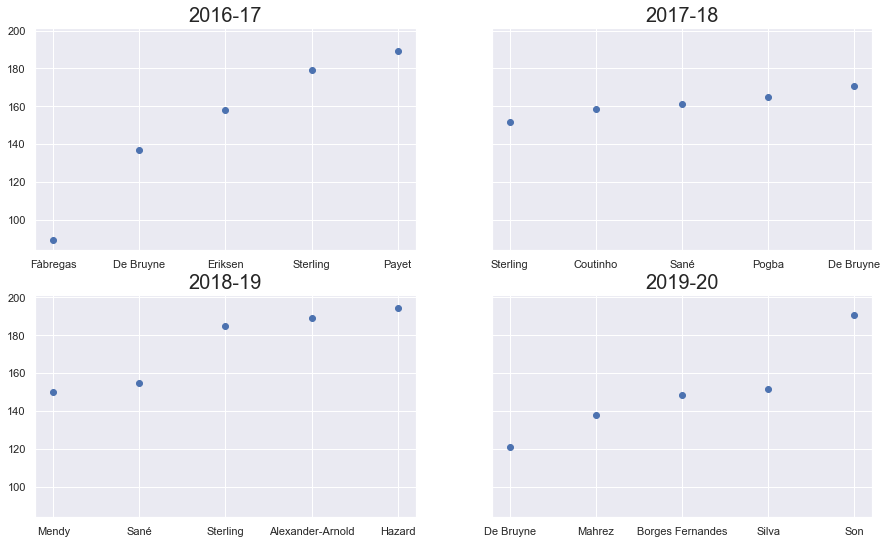

In [91]:
top_mpa = []
for d in data_list:
    d = d.loc[d['assists'] > 5]
    top_mpa.append(d[['second_name', 'mins/assist']].sort_values(by='mins/assist', ascending=True).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_mpa[i]['second_name'], top_mpa[i]['mins/assist'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

## Total points

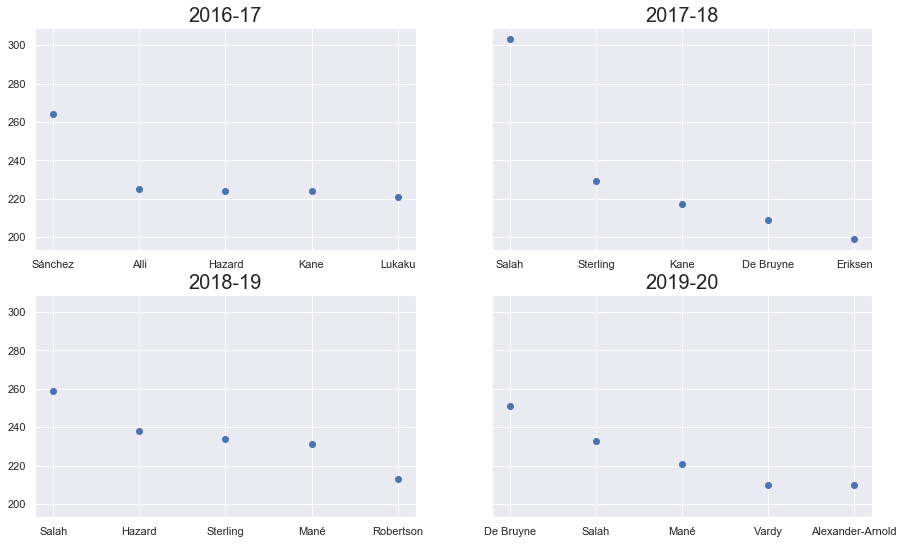

In [90]:
top_points = []
for d in data_list:
    top_points.append(d[['second_name', 'total_points']].sort_values(by='total_points', ascending=False).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_points[i]['second_name'], top_points[i]['total_points'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

## Points per 90 minutes played (for players with > 500 minutes)

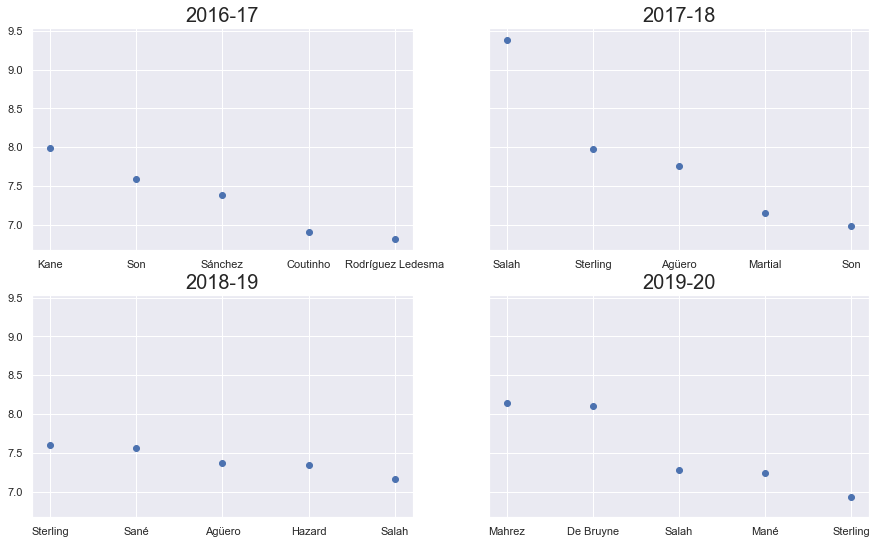

In [89]:
top_pp90 = []
for d in data_list:
    d = d.loc[d['minutes'] > 1500] # almost half the season played
    top_pp90.append(d[['second_name', 'points/90']].sort_values(by='points/90', ascending=False).head(5))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize =(15,9))
plots = [ax1, ax2, ax3, ax4]
i = 0
for ax in plots:
    ax.scatter(top_pp90[i]['second_name'], top_pp90[i]['points/90'])
    ax.set_title(seasons[i], fontsize=20)
    i += 1

## Points per cost (at start of the season). Who was the best FPL bargain in the past 3 seasons?

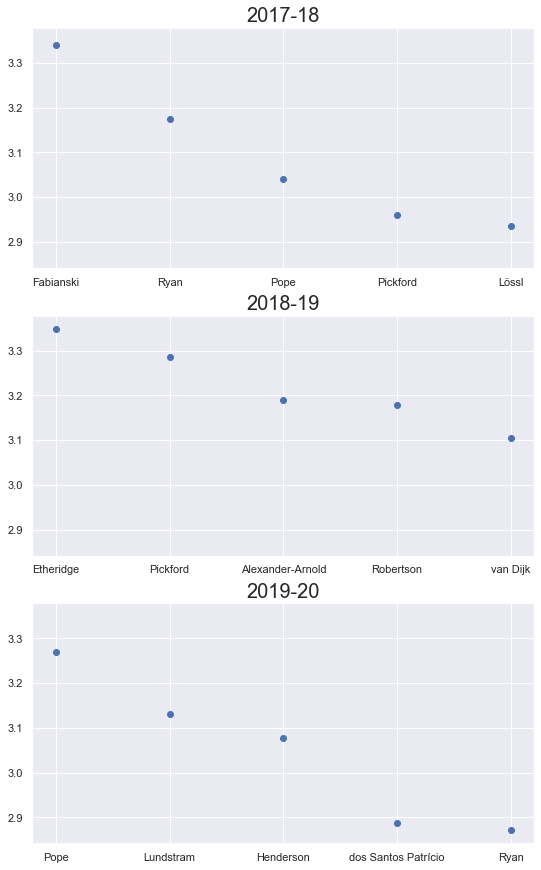

In [100]:
top_ppc = []
for d in data_list[1:]: # no data for 2016-17
    d['points/cost'] = d['total_points']/d['now_cost']
    top_ppc.append(d[['second_name', 'points/cost']].sort_values(by='points/cost', ascending=False).head(5))

f, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharey=True, figsize =(9,15))
plots = [ax1, ax2, ax3]
i = 0
for ax in plots:
    ax.scatter(top_ppc[i]['second_name'], top_ppc[i]['points/cost'])
    ax.set_title(seasons[i+1], fontsize=20)
    i += 1

## Gameweek 1 data

In [7]:
gw_1 = pd.read_csv(Path.cwd() / 'data' / '2019-20' / 'gws' / 'gw1.csv')
gw_1.sort_values(by='total_points', ascending=False).head(10)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
423,Raheem_Sterling_214,0,3,55,1,12.7,214,8,0,3,...,5,0,74.0,20,0,0,0,120,False,1
156,Erik_Pieters_447,2,2,43,1,25.1,447,3,0,0,...,0,3,1.0,14,0,0,0,45,True,0
433,Riyad_Mahrez_217,3,2,45,1,51.2,217,8,0,0,...,5,0,39.0,14,0,0,0,85,False,0
48,Ashley_Barnes_90,0,3,58,1,1.8,90,3,0,2,...,0,3,89.0,13,0,0,0,65,True,0
190,Harry_Kane_338,0,3,50,0,24.1,338,6,1,2,...,1,3,95.0,13,0,0,0,110,True,0
331,Marcus_Rashford_233,0,3,53,1,1.9,233,9,0,2,...,0,4,58.0,13,0,0,0,85,True,0
15,Ainsley_Maitland-Niles_4,1,3,38,1,12.3,4,10,0,0,...,1,0,0.0,12,0,0,0,50,False,0
138,Divock_Origi_188,1,3,46,0,26.4,188,1,1,1,...,1,4,21.0,12,0,0,0,55,True,0
372,Mohamed_Salah_191,1,2,40,0,39.7,191,1,1,1,...,1,4,39.0,12,0,0,0,125,True,0
310,Lewis_Dunk_42,1,3,41,1,13.3,42,7,0,0,...,3,0,2.0,11,0,0,0,45,False,1


## All gameweek data

In [8]:
# '2016-17' & '2017-18' don't have 'merged_gw.csv'
df_names = ['2018-19', '2019-20']

gw_data = []
for n in df_names:
    gw_data.append(pd.read_csv(Path.cwd() / 'data' / n / 'gws' / 'merged_gw.csv'))

gw_data[1].columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [9]:
gw_data[1]

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0.0,0.0,0,0,0,0,50,True,0,1
1,Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,...,3.0,0.0,1,0,0,0,50,True,0,1
2,Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,...,0.0,0.0,0,0,0,0,50,False,0,1
3,Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,...,1.0,0.0,2,0,0,0,45,True,0,1
4,Aaron_Wan-Bissaka_122,0,2,34,1,16.1,122,9,0,0,...,4.0,2.0,8,0,0,0,55,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22555,Youri_Tielemans_448,0,0,11,0,37.4,448,376,1,0,...,0.0,19.0,2,-3103,1905,5008,61,True,0,47
22556,Yves_Bissouma_53,0,0,22,0,1.3,53,372,1,1,...,1.0,7.0,7,77,147,70,50,False,0,47
22557,Zech_Medley_636,0,0,0,0,0.0,636,371,0,0,...,3.0,0.0,0,153,325,172,40,True,0,47
22558,Çaglar_Söyüncü_164,0,0,0,0,0.0,164,376,0,0,...,0.0,0.0,0,-95515,165,95680,49,True,0,47


In [10]:
gw_data[1].describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,...,22501.000000,22501.000000,22560.000000,22560.000000,2.256000e+04,2.256000e+04,2.256000e+04,22560.000000,22560.000000,22560.000000
mean,0.039938,0.107624,6.099291,0.104034,4.820607,298.897473,198.843218,0.504167,0.044371,1.771698,...,1.199458,1.513533,5.553103,1.374645,4.702573e+02,1.127918e+04,1.080884e+04,51.730807,0.056693,22.757624
std,0.211490,0.489831,9.691495,0.305311,10.801394,174.966518,109.609386,0.954657,0.229731,3.077582,...,1.190086,1.245349,14.012796,2.500725,4.673849e+04,4.128360e+04,3.543241e+04,12.140661,0.231261,14.185842
min,0.000000,0.000000,-12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.000000,-1.245778e+06,0.000000e+00,0.000000e+00,38.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.370000e+03,6.200000e+01,1.800000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,296.000000,204.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-1.000000e+02,4.580000e+02,1.102000e+03,49.000000,0.000000,21.000000
75%,0.000000,0.000000,10.000000,0.000000,2.800000,448.000000,294.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,5.800000e+01,4.017000e+03,6.593250e+03,55.000000,0.000000,39.000000
max,3.000000,3.000000,90.000000,1.000000,133.500000,669.000000,380.000000,9.000000,4.000000,35.800000,...,9.000000,8.000000,181.000000,26.000000,9.849500e+05,1.030761e+06,1.263230e+06,128.000000,1.000000,47.000000


## Historical player data

In [11]:
player = pd.read_csv(Path.cwd() / 'data' / '2019-20' / 'players' / 'Sergio_Agüero_210' / 'history.csv')
player

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,own_goals,penalties_missed,penalties_saved,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards
0,9,30,0,18,0.0,37572,114,18,23,0.0,...,0,0,0,0,0,2011/12,110,0.0,211,2
1,3,16,0,10,0.0,37572,111,20,12,0.0,...,0,0,0,0,0,2012/13,115,0.0,121,2
2,11,22,176,9,0.0,37572,126,13,17,0.0,...,0,1,0,0,0,2013/14,110,0.0,156,4
3,10,27,831,9,0.0,37572,129,31,26,0.0,...,0,1,0,0,0,2014/15,120,0.0,216,4
4,3,24,655,12,0.0,37572,133,30,24,0.0,...,0,1,0,0,0,2015/16,130,0.0,184,1
5,5,32,640,8,518.2,37572,127,30,20,323.9,...,0,1,0,1,0,2016/17,130,1853.0,175,4
6,6,22,740,13,570.8,37572,115,12,21,302.5,...,0,0,0,0,0,2017/18,115,1484.0,169,2
7,11,26,740,17,523.7,37572,120,15,21,315.4,...,0,0,0,0,0,2018/19,110,1685.0,201,4


In [12]:
player.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element_code',
       'end_cost', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'saves', 'season_name', 'start_cost', 'threat',
       'total_points', 'yellow_cards'],
      dtype='object')

## Extracting historical data about players

just realised should be separating GKs now, as they will not have the same stats <br>
should therefore separate all positions really

In [13]:
player_names = os.listdir(Path.cwd() / 'data' / '2019-20' / 'players')

names = []
seasons = []
points_18_19 = []
cost_18_19 = []

a = np.empty((1,len(player.columns)))
a[:] = np.NaN
NaN_df = pd.DataFrame(a, columns=[player.columns])

# can't seem to create empty data frame so have created with arbitrary first line to remove later
player_data = pd.DataFrame(player.loc[player.season_name=='2017/18'])
for name in player_names:
    if os.path.isfile(Path.cwd() / 'data' / '2019-20' / 'players' / name / 'history.csv') == True:
        df = pd.read_csv(Path.cwd() / 'data' / '2019-20' / 'players' / name / 'history.csv')
        if df['season_name'].str.contains('2018/19').any() and df['season_name'].str.contains('2017/18').any():
            names.append(name)
            seasons.append(len(df))
            points_18_19.append(df.loc[df.season_name=='2018/19', 'total_points'].item())
            cost_18_19.append(df.loc[df.season_name=='2018/19', 'start_cost'].item())
            player_data = player_data.append(df.loc[df.season_name=='2017/18'], ignore_index=True)
            
player_data = player_data.iloc[1:]
player_data['name'] = names
player_data['cost_18_19'] = cost_18_19
player_data['points_18_19'] = points_18_19
#print(len(player_data), len(names), len(cost_18_19), len(points_18_19))
player_data

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards,name,cost_18_19,points_18_19
1,7,10,613,10,562.7,55459,49,60,1,145.0,...,0,0,2017/18,50,193.0,118,7,Aaron_Cresswell_376,55,34
2,4,0,204,6,203.2,17349,54,30,0,73.3,...,0,0,2017/18,55,297.0,65,2,Aaron_Lennon_430,50,41
3,3,8,576,10,848.8,74471,52,52,4,195.2,...,0,0,2017/18,55,350.0,113,4,Aaron_Mooy_516,55,76
4,0,0,116,2,60.0,214590,45,10,0,26.8,...,0,0,2017/18,45,2.0,15,1,Aaron_Wan-Bissaka_122,40,120
5,4,16,679,9,595.8,121599,52,63,7,199.7,...,0,0,2017/18,50,537.0,136,10,Abdoulaye_Doucouré_368,60,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,8,13,522,9,891.5,47431,70,19,6,224.5,...,0,0,2017/18,70,715.0,130,1,Willian_Borges Da Silva_113,75,108
318,0,0,54,1,0.0,20310,48,4,0,5.5,...,0,7,2017/18,50,0.0,11,0,Willy_Caballero_112,50,13
319,3,5,190,4,267.0,108413,46,16,2,64.3,...,0,0,2017/18,50,136.0,53,0,Will_Hughes_370,50,87
320,0,3,264,5,48.8,48717,48,27,0,43.6,...,0,0,2017/18,50,64.0,42,5,Winston_Reid_383,45,0


In [14]:
player_data.describe()

,assists,bonus,bps,clean_sheets,creativity,element_code,end_cost,goals_conceded,goals_scored,ict_index,...,penalties_missed,penalties_saved,red_cards,saves,start_cost,threat,total_points,yellow_cards,cost_18_19,points_18_19
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,2.218069,5.806854,331.492212,5.906542,257.835202,92331.224299,54.520249,24.043614,2.395639,93.860125,...,0.056075,0.059190,0.090343,5.398754,55.996885,278.598131,72.177570,2.485981,55.264798,67.813084
std,3.080551,6.375741,219.770777,4.433959,288.422080,60393.988653,14.961003,16.297947,4.180593,78.732428,...,0.268041,0.315611,0.308120,21.604756,14.440719,349.975049,50.960244,2.412330,14.356237,53.304631
min,0.000000,0.000000,-1.000000,0.000000,0.000000,6744.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,0.000000,171.000000,2.000000,32.100000,47431.000000,45.000000,11.000000,0.000000,33.100000,...,0.000000,0.000000,0.000000,0.000000,45.000000,26.000000,32.000000,0.000000,45.000000,24.000000
50%,1.000000,4.000000,335.000000,6.000000,163.500000,77794.000000,49.000000,25.000000,1.000000,83.400000,...,0.000000,0.000000,0.000000,0.000000,50.000000,145.000000,72.000000,2.000000,50.000000,60.000000
75%,3.000000,9.000000,491.000000,9.000000,377.200000,122798.000000,58.000000,34.000000,3.000000,127.100000,...,0.000000,0.000000,0.000000,0.000000,60.000000,404.000000,101.000000,4.000000,60.000000,98.000000
max,18.000000,31.000000,913.000000,19.000000,1744.200000,433154.000000,131.000000,63.000000,32.000000,454.400000,...,2.000000,3.000000,2.000000,137.000000,125.000000,2355.000000,303.000000,11.000000,130.000000,259.000000


In [15]:
player_data_ordered = player_data[['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'end_cost',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'saves', 'start_cost', 'threat', 'total_points',
       'yellow_cards', 'cost_18_19', 'points_18_19']]
player_data_ordered

,name,assists,bonus,bps,clean_sheets,creativity,end_cost,goals_conceded,goals_scored,ict_index,...,penalties_missed,penalties_saved,red_cards,saves,start_cost,threat,total_points,yellow_cards,cost_18_19,points_18_19
1,Aaron_Cresswell_376,7,10,613,10,562.7,49,60,1,145.0,...,0,0,0,0,50,193.0,118,7,55,34
2,Aaron_Lennon_430,4,0,204,6,203.2,54,30,0,73.3,...,0,0,0,0,55,297.0,65,2,50,41
3,Aaron_Mooy_516,3,8,576,10,848.8,52,52,4,195.2,...,0,0,0,0,55,350.0,113,4,55,76
4,Aaron_Wan-Bissaka_122,0,0,116,2,60.0,45,10,0,26.8,...,0,0,0,0,45,2.0,15,1,40,120
5,Abdoulaye_Doucouré_368,4,16,679,9,595.8,52,63,7,199.7,...,0,0,0,0,50,537.0,136,10,60,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Willian_Borges Da Silva_113,8,13,522,9,891.5,70,19,6,224.5,...,0,0,0,0,70,715.0,130,1,75,108
318,Willy_Caballero_112,0,0,54,1,0.0,48,4,0,5.5,...,0,0,0,7,50,0.0,11,0,50,13
319,Will_Hughes_370,3,5,190,4,267.0,46,16,2,64.3,...,0,0,0,0,50,136.0,53,0,50,87
320,Winston_Reid_383,0,3,264,5,48.8,48,27,0,43.6,...,0,0,0,0,50,64.0,42,5,45,0


In [16]:
player_data_ordered.to_csv('historical_player_data.csv', index=False)

## Exploring historical player data

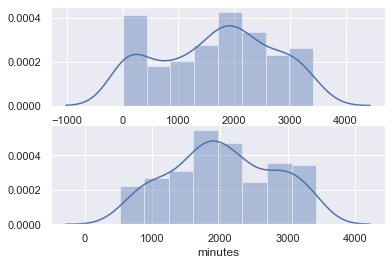

In [17]:
plt.subplot(211)
sns.distplot(player_data_ordered['minutes'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.minutes > 500, 'minutes'])

Justification to only analyse players with > 25 points & > 500 minutes in 17_18?

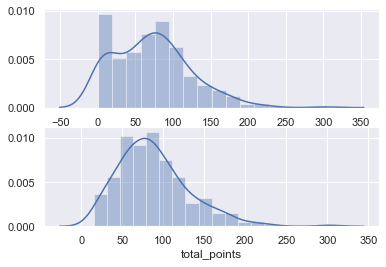

In [18]:
plt.subplot(211)
sns.distplot(player_data_ordered['total_points'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.minutes > 500, 'total_points'])

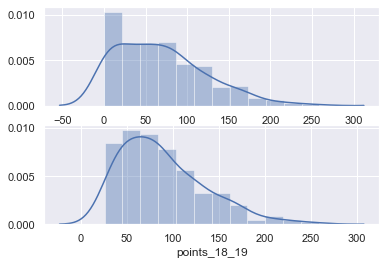

In [19]:
plt.subplot(211)
sns.distplot(player_data_ordered['points_18_19'])
plt.subplot(212)
sns.distplot(player_data_ordered.loc[player_data_ordered.points_18_19 > 25, 'points_18_19'])

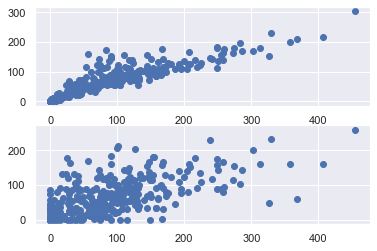

In [20]:
plt.subplot(211)
plt.scatter(player_data_ordered['ict_index'], player_data_ordered['total_points'])
plt.subplot(212)
plt.scatter(player_data_ordered['ict_index'], player_data_ordered['points_18_19'])

## Regression analysis

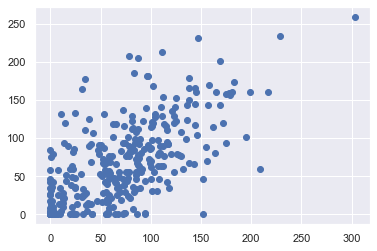

In [21]:
plt.scatter(player_data_ordered['total_points'], player_data_ordered['points_18_19'])

### Multicolinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = player_data_ordered.iloc[:,1:-1]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,10.614242,assists
1,11.056960,bonus
2,164.472703,bps
3,37.353325,clean_sheets
4,24455.134968,creativity
5,887.352711,end_cost
6,53.192507,goals_conceded
7,22.039562,goals_scored
8,244227.282585,ict_index
9,40084.593495,influence


'ict_index' is calculated from 'threat', 'creativity', and 'influence', explains high VIF

### Restrict data to players with > 500 minutes in 17/18 (?), and > 25 points in 18/19

In [23]:
player_data_restrict = player_data_ordered[(player_data_ordered.minutes > 500) & (player_data.points_18_19 > 25)]
player_data_restrict[['minutes', 'total_points', 'points_18_19']].describe()

,minutes,total_points,points_18_19
count,215.000000,215.000000,215.000000
mean,2156.302326,94.734884,91.855814
std,753.257212,43.735285,46.318308
min,530.000000,15.000000,26.000000
25%,1663.000000,65.000000,56.000000
50%,2169.000000,87.000000,83.000000
75%,2817.000000,116.000000,119.000000
max,3420.000000,303.000000,259.000000


## Declare features and standardize

In [24]:
#player_data_restrict[['start_cost', 'end_cost', 'cost_18_19']]
player_data_restrict['season_cost_change'] = player_data_restrict['cost_18_19'] - player_data_restrict['start_cost']
player_data_restrict['points/90'] = player_data_restrict['total_points']/player_data_restrict['minutes']*90

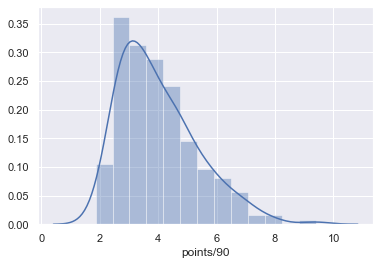

In [25]:
sns.distplot(player_data_restrict['points/90'])

In [26]:
# single feature
#inputs = np.array(test_df['total_points']).reshape(-1,1)

# named features
#inputs = player_data_restrict[['assists', 'bonus', 'bps', 'clean_sheets', 'end_cost',
#       'goals_conceded', 'goals_scored', 'minutes',
#       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
#       'saves', 'start_cost', 'total_points',
#       'yellow_cards', 'cost_18_19', 'ict_index']]
# 'creativity', 'influence',  'threat',

inputs = player_data_restrict[['total_points', 'season_cost_change', 'minutes', 'points/90']] # gives good accuracy

# all features
#inputs = player_data_restrict.iloc[:,1:-1]
targets = player_data_restrict['points_18_19']
#targets = player_data_restrict.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## Split the data

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

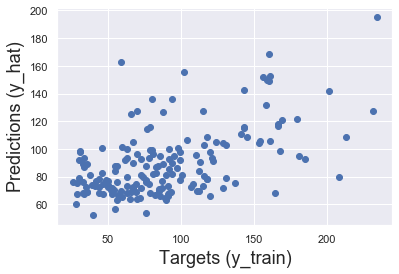

In [29]:
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

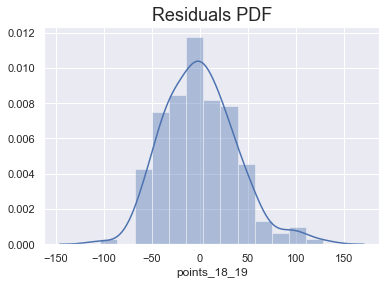

In [30]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

In [31]:
r2 = reg.score(x_train, y_train)
r2

0.30213378516101286

In [32]:
n = inputs.shape[0]
p = inputs.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2 

0.28884109535455593

## Manually check the accuracy

e.g. how many predictions are within 10% of the targets <br>

is the absolute difference between y_hat and y less than 10% of y

In [61]:
model_outputs = reg.predict(x_train)
threshold = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
acc = []
for t in threshold:
    acc.append((np.sum(abs(model_outputs-y_train) <= y_train * t) / model_outputs.shape[0]).round(2))
    
acc_df = pd.DataFrame(threshold, columns=['threshold'])
acc_df['accuracy'] = acc
acc_df

,threshold,accuracy
0,0.05,0.12
1,0.10,0.21
2,0.20,0.39
3,0.30,0.53
4,0.40,0.65
5,0.50,0.75


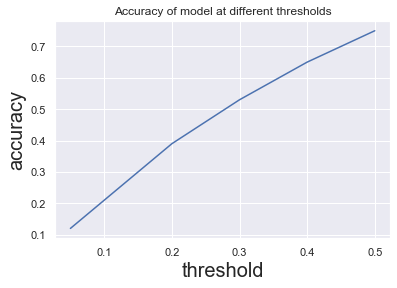

In [62]:
plt.plot(acc_df['threshold'], acc_df['accuracy'])
plt.title('Accuracy of model at different thresholds')
plt.xlabel('threshold', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.show()

### Creating a summary table

In [35]:
reg.intercept_

90.86995433201903

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
# add bias to table
#reg_summary = reg_summary.index + 1
#reg_summary.loc[0] = ['intercept', reg.intercept_[0]]
#reg_summary = reg_summary.sort_index()
reg_summary.sort_values('Weights', ascending=False)

,Features,Weights
0,total_points,42.389879
1,season_cost_change,2.481807
3,points/90,-8.870807
2,minutes,-20.779451


## Testing

In [37]:
y_hat_test = reg.predict(x_test)

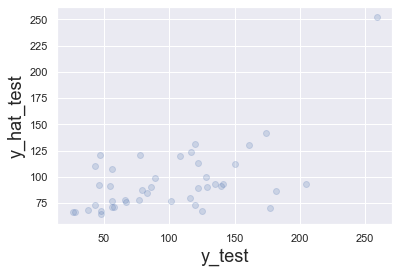

In [38]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('y_test', size=18)
plt.ylabel('y_hat_test', size=18)
plt.show()

In [39]:
y_hat_test

array([ 77.25525594, 120.03454322, 129.89499902,  93.09300069,
        93.16338798,  77.55462724,  90.99591603,  78.2217496 ,
        79.47885951,  99.82257118,  73.2857734 ,  90.40338461,
        76.83615835, 120.72687523,  75.84454874, 110.02226276,
        73.67110409, 113.5174916 , 252.49696284,  71.60993922,
        87.47523644, 123.82714779,  86.5526314 ,  70.82106773,
       121.03836051,  66.10497671,  68.11816337,  64.25848264,
       107.42768897,  99.19240772,  84.92776701, 131.17632094,
        92.47158724,  67.86887931,  71.49462062, 112.51755284,
        67.58348147,  66.92604601,  93.40334022, 141.32453543,
        90.46496979,  89.16021747,  90.97528852])

In [40]:
table = pd.DataFrame(y_test)
table['y_hat'] = y_hat_test
table['delta'] = table.iloc[:,0] - table.iloc[:,1]
table['perc_diff'] = abs(table['delta'] / table['points_18_19'] * 100)
table['name'] = player_data_restrict['name']
table['total_points'] = player_data_restrict['total_points']
table.drop(table[table.points_18_19 == 0].index, inplace=True)
table = table[['name', 'total_points', 'points_18_19', 'y_hat', 'delta', 'perc_diff']]
table.sort_values(by='points_18_19', ascending=False)

,name,total_points,points_18_19,y_hat,delta,perc_diff
229,Mohamed_Salah_191,303,259,252.496963,6.503037,2.510825
258,Pierre-Emerick_Aubameyang_11,87,205,93.093001,111.906999,54.588780
123,Gylfi_Sigurdsson_151,96,182,86.552631,95.447369,52.443609
35,Aymeric_Laporte_202,35,177,70.821068,106.178932,59.988097
151,Jamie_Vardy_166,183,174,141.324535,32.675465,18.779003
205,Marcos_Alonso_103,165,161,129.894999,31.105001,19.319876
190,Kyle_Walker_203,138,150,112.517553,37.482447,24.988298
174,Joshua_King_68,110,141,93.403340,47.596660,33.756496
247,Patrick_van Aanholt_123,95,140,90.995916,49.004084,35.002917
23,Andros_Townsend_135,121,135,93.163388,41.836612,30.990083


In [41]:
table.describe()

,total_points,points_18_19,y_hat,delta,perc_diff
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,99.627907,100.116279,95.186981,4.929298,43.704207
std,50.020007,52.514492,31.969296,42.995404,42.282569
min,21.000000,26.000000,64.258483,-73.726875,0.720295
25%,67.500000,56.000000,74.757826,-20.209820,15.859311
50%,96.000000,89.000000,90.403385,-6.827148,30.990083
75%,123.000000,128.500000,108.724976,34.680462,54.883083
max,303.000000,259.000000,252.496963,111.906999,156.865692


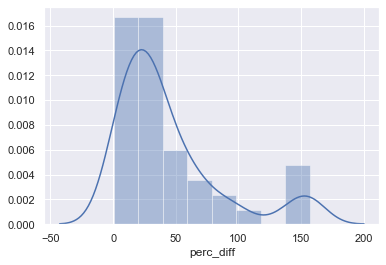

In [42]:
sns.distplot(table['perc_diff'])

## K-means clustering

In [48]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
x = player_data_restrict[['cost_18_19', 'points_18_19']]
x_scaled = preprocessing.scale(x)
kmeans = KMeans(4)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
x_copy = x.copy()
x_copy['category'] = kmeans.fit_predict(x_scaled)

Text(0.5, 1.0, 'Clusters of players')

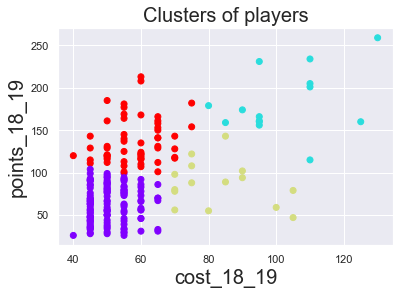

In [50]:
plt.scatter(x['cost_18_19'], x['points_18_19'], c=x_copy['category'], cmap='rainbow')
plt.xlabel('cost_18_19', fontsize=20)
plt.ylabel('points_18_19', fontsize=20)
plt.title('Clusters of players', fontsize=20)

Four clusters: <br>
Low cost, low points <br>
Low cost, high points <br>
High cost, low points <br>
High cost, high points

### Elbow method and WCSS

In [51]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[429.99999999999994,
 216.37680259717973,
 133.8850734166943,
 109.13735553850626,
 84.60800117158075,
 71.4115397535891,
 58.93566930590673,
 48.69963281411031,
 42.20100665835767]

Text(0, 0.5, 'Within-cluster Sum of Squares')

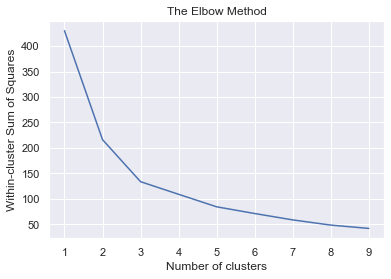

In [52]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')